In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

[-1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.]
-0.0625


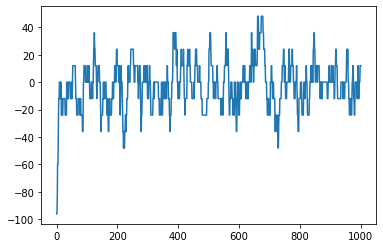

In [2]:
def flip_spin(chain):
    flip = random.randint(0, chain.size-1)
    chain[flip] = -1*chain[flip]
    return chain

def chain_energy(chain):
    i = 0
    J = 3.0    # interaction energy
    E = 0.0    # total energy
    while i < chain.size:
        E += -1.0*J*chain[i]*chain[i-1]
        i += 1
    return E

def main_1D(T):
    #T = 10 # units of J/k
    n = 32    # Number of Spins
    acceptance = 0
    eq = True
    iteration = 0
    max_iter = 1000

    ## initialize the ising chain of spins
    chain = -np.ones(n)#np.random.randint(2,size=n)
    for spin in range(0,n):
        if chain[spin] == 0.0:
            chain[spin] = -1.
    energies = np.array([chain_energy(chain)])
    
    while eq:
        e1 = chain_energy(chain)
        temp_chain = flip_spin(chain)
        e2 = chain_energy(temp_chain)
        delta_E = e2 - e1

        if delta_E < 0.0:
            acceptance += 1
            chain = temp_chain
            energies = np.append(energies,e2)
        else:
            p = np.exp(-delta_E/T)
            r = np.random.random()
            if r <= p:
                acceptance += 1
                chain = temp_chain
                energies = np.append(energies,e2)
            else:
                energies = np.append(energies,e1)
        iteration += 1
        if iteration > max_iter:
            eq = False
    return chain,energies 
chain,energies = main_1D(10)
print(chain)
plt.plot(energies)
maggie = np.average(chain)
print(maggie)

In [3]:
temperatures = np.linspace(5, 150, 50)
#spins = np.zeros(50)
energies = np.zeros(50)
Cv = np.zeros(50)
magnit = np.zeros(50)
for i in range(0,50):
    temp = temperatures[i]
    en = np.zeros(10)
    heatcap = np.zeros(10)
    mag = np.zeros(10)
    for j in range(0,10):
        spin_arr,energy_arr = main_1D(temp)
        avg_energy = np.average(energy_arr)
        avg_sqrd_energy = np.average(np.multiply(energy_arr,energy_arr))
        en[j] = avg_energy
        mag[j] = np.average(spin_arr)
        heatcap[j] = (temp+0.00000001)**-2 * (avg_sqrd_energy - avg_energy**2)
        #sqrd_mag = np.average(np.multiply(spin_arr,spin_arr))
                #np.sum(np.multiply(spin_arr,spin_arr))/len(spin_arr)
        #iso = (temp+0.00000001)**-1 * (sqrd_mag - mag[j]**2)
    energies[i] = np.mean(en)
    magnit[i] = np.mean(mag)
    Cv[i] = np.mean(heatcap)
        
        #print(avg_energy, avg_sqrd_energy, avg_spin, avg_sqrd_spin)


0.006999999999999999
[ 1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1.]


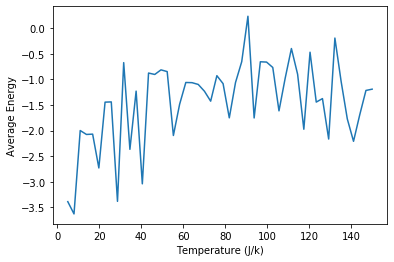

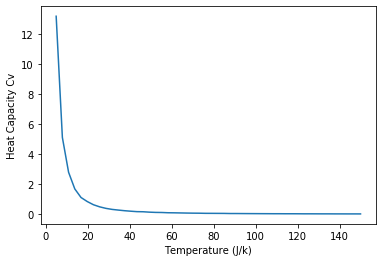

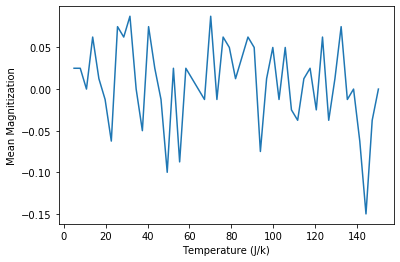

In [4]:
plt.figure(1)
plt.plot(temperatures,energies)
plt.xlabel('Temperature (J/k)')
plt.ylabel('Average Energy')
plt.figure(2)
plt.plot(temperatures,Cv)
plt.xlabel('Temperature (J/k)')
plt.ylabel('Heat Capacity Cv')
plt.figure(3)
plt.plot(temperatures,magnit)
plt.xlabel('Temperature (J/k)')
plt.ylabel('Mean Magnitization')
print(np.mean(magnit))
print(spin_arr)

Questions/Tasks:
1. Why, in eq. (1), are we not also considering $s_{i-1}$ when computing the energy, it is a nearest neighbor after all? Discuss.

We do not consider $s_{i-1}$ when computing the energy because of the ising chain's toroidal nature. The energy between neighbors is found sequentially, so the energy between $s_{i}$ and $s_{i-1}$ will be found separately. 

2. One generally chooses J>0.  What does that imply for the energetically favored orientation of nearest neighbors? Discuss. Explore what happens when you choose J<0.

J>0 implies that the favored orientation of the nearest neigbors is parallel. Because J is positive, the neighboring spins will 'want' to be in the same direction. When J<0, the spins will tend towards being anti-parallel, spinning in opposite directions. 

3. How do you decide if and when the system has reached equilibrium? Discuss. 

The system reaches equilibrium after the total energy has started to oscillate around one value. It will never stay exactly at one energy, as spins will still randomly flip once the system has reached equilibrium, but the energy of the system is considered to be the average once it reaches equilibrium. 

4. How does the acceptance rate evolve upon approaching equilibrium? Discuss. 



5. For N=32 compute, plot and discuss the temperature dependence of equilibrium quantities of interest such as the energy $E$, the magnetization $M$ and the heat capacity $C$.  Note: although $C = \frac{dE}{dT}$,  taking the derivative numerically is something to be avoided (very noise sensitive).  Therefore, you may want to compute it by other means.  In presenting and discussing your results, be clear about the initial conditions you chose, your requirements for equilibrium, the temperature, and value of J, etc. 



6. Finally, take a case for which  J=3kT (low temperature case) and start with randomized spin orientations. Compute the magnetization at equilibrium.  The magnetization as found analytically is given by: 
$m = \frac{sin(\beta H)}{(sin^2(\beta H)+e^{-4 \beta J})^{1/2}}$
and equals 0 so long no external field is applied (H=0).  Only at T=0 does the 1D Ising model become ferromagnetic, that is, has it m!=0 when H=0. How does that compare to your simulation? How well does your simulation capture low temperature behavior? Is the Metropolis algorithm (acceptance rate) very efficient at low temperatures?  Discuss.   


